In [2]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

### 0. Line plot 

In [40]:
x = np.arange(0, 5, 0.1)
def square(x):
    return x**2

def cubic(x):
    return 5 * x**0.5

Plotly themes:
- 'ggplot2' 
- 'seaborn' 
- 'simple_white' 
- 'plotly'
- 'plotly_white' 
- 'plotly_dark' 
- 'presentation'
- 'xgridoff'
- 'ygridoff' 
- 'gridon' 

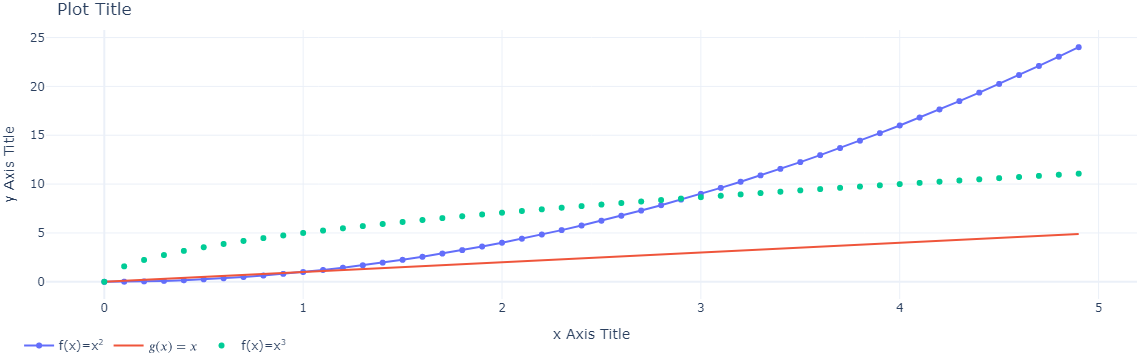

In [46]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=square(x), mode='lines+markers' , name='f(x)=x<sup>2</sup>')) # use <sup> because LATEX doens't work for hint
fig.add_trace(go.Scatter(x=x, y=x, name='$$g(x)=x$$'))
fig.add_trace(go.Scatter(x=x, y=cubic(x), mode='markers' , name='f(x)=x<sup>3</sup>'))
fig.update_layout(legend_orientation="h", 
                  legend=dict(x=.1, xanchor="center"),
                  title="Plot Title",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  template = 'plotly_white',
                  margin=dict(l=5, r=5, t=30, b=20) # by default 20 px
                 )
fig.show()

### 1. Scatter plot 

In [42]:
np.random.seed(0)
x_var = np.random.normal(size = 6000)
y_var = np.random.normal(size = 6000)

norm_data = pd.DataFrame({'x_var':x_var
                         ,'y_var':y_var}
                         )

norm_data = norm_data.assign(category_var = np.where(x_var > 1, "Category A","Category B"))

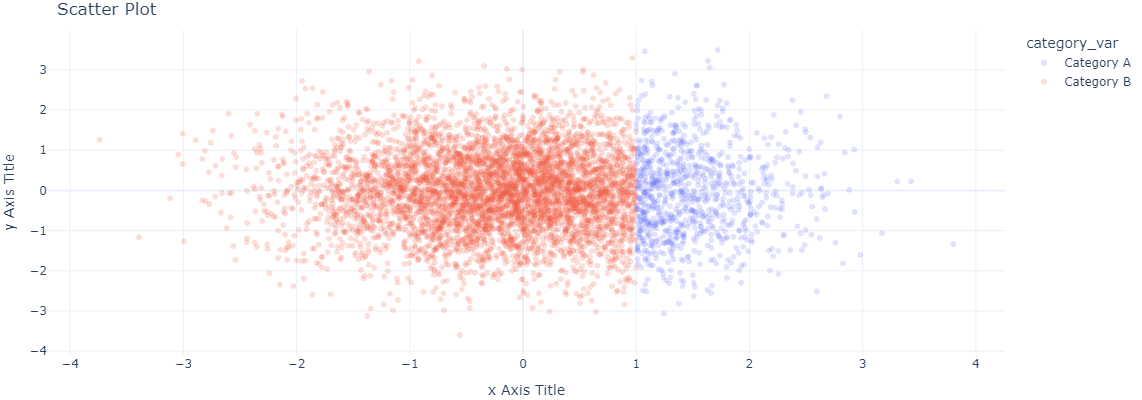

In [52]:
fig = px.scatter(data_frame = norm_data
                 ,x = 'x_var'
                 ,y = 'y_var'
                 ,color = 'category_var'
                 ,opacity = .2,
                )
fig.update_layout(title="Scatter Plot",
                  xaxis_title="x Axis Title",
                  yaxis_title="y Axis Title",
                  template = 'plotly_white',
                  margin=dict(l=5, r=5, t=30, b=20),
                  width=800, height=400
                 )
fig.show()

### 2. Subplots

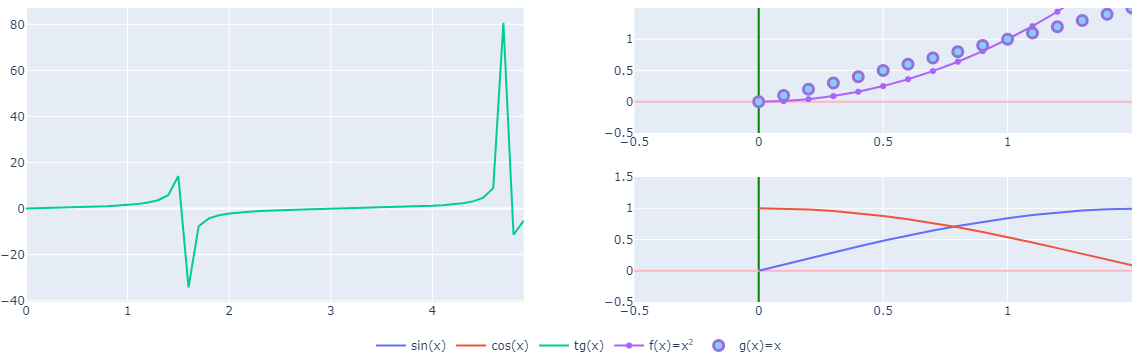

In [59]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"rowspan": 2}, {}], [None, {}]])


fig.update_yaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='LightPink', col=2)
fig.update_xaxes(range=[-0.5, 1.5], zeroline=True, zerolinewidth=2, zerolinecolor='#008000', col=2)

fig.add_trace(go.Scatter(x=x, y=np.sin(x),  name='sin(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=np.cos(x),  name='cos(x)'), 2, 2)
fig.add_trace(go.Scatter(x=x, y=np.tan(x),  name='tg(x)'), 1, 1)

fig.add_trace(go.Scatter(x=x, y=square(x), mode='lines+markers',  name='f(x)=x<sup>2</sup>'), 1, 2)
fig.add_trace(go.Scatter(x=x, y=x, mode='markers',name='g(x)=x',
                         marker=dict(color='LightSkyBlue', size=10, line=dict(color='MediumPurple', width=3))), 1, 2)
fig.update_layout(legend_orientation="h",
                  legend=dict(x=.5, xanchor="center"),
                  hovermode="x",
                  margin=dict(l=0, r=0, t=0, b=0))
fig.update_traces(hoverinfo="all", hovertemplate="Value: %{x}<br>Function: %{y}")
fig.show()